In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Droid Serif') 

/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_97978/571444951.py:55: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  pdx_bond = pd.read_csv(f'../{arch}/EXACT_PDX_BOND.csv', index_col=False)
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_97978/571444951.py:57: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  pdx = pd.read_csv(f'../{arch}/EXACT_PDX.csv', index_col=False)
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_97978/571444951.py:104: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.barplot(
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_97978/571444951.py:148: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  pdx_ads = pd.read_csv(f'../{arch}/IVF_PDX_ADSAMPLI

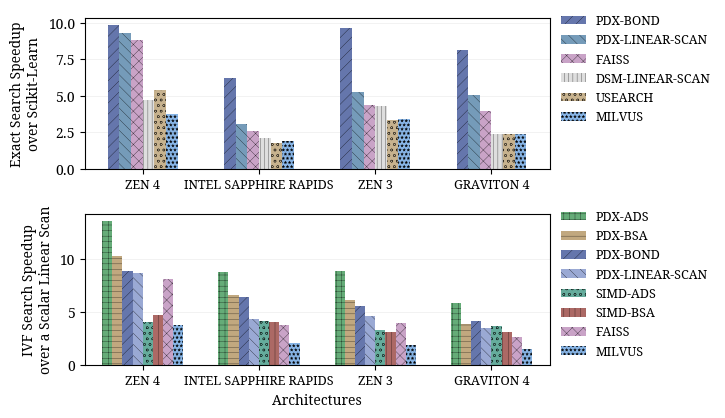

In [7]:
from statistics import geometric_mean

font = {'size': 10}
matplotlib.rc('font', **font)

DATASETS_MAPPING = {
    'nytimes-16-angular': 'NYTimes/16',
    'glove-50-angular': 'GloVe/50',
    'deep-image-96-angular': 'DEEP/96',
    'sift-128-euclidean': 'SIFT/128',
    'glove-200-angular': 'GloVe/200',
    'msong-420': 'MSong/420',
    'contriever-768': 'Contriever/768',
    'instructorxl-arxiv-768': 'arXiv/768',
    'gist-960-euclidean': 'GIST/960',
    'openai-1536-angular': 'OpenAI/1536',
}

arch_mapping = {
    'ZEN4_INSITU': 'ZEN 4',
    'ZEN4_AWS': 'ZEN 4',
    'SAPPHIRE': 'INTEL SAPPHIRE RAPIDS',
    'ZEN3': 'ZEN 3',
    'GRAVITON4': 'GRAVITON 4',
    'M1': 'M1'
}

fig, (
    ax1, ax2
) = plt.subplots(2, 1)
fig.set_size_inches(6, 4.5)
plots = [ax1, ax2]

plt.subplots_adjust(hspace=0.30, wspace=0.40)

matplotlib.rcParams['hatch.linewidth'] = 0.2

def geometric_mean(series):
    return np.exp(np.log(series).mean())

archs = [
    'ZEN4_INSITU', 
    'SAPPHIRE', 'ZEN3', 'GRAVITON4']

for i in range(2):
    ax = plots[i]
    if i == 0:

        patterns =('///', '\\\\\\', 'xxx', '||||', 'ooo', '****', '|||', '***', )
        # PDX-BOND, PDX LINEAR, FAISS, DSM, USEARCH, MILVUS
        palet = ["#5970B8", "#6a9dc4", "#cf9dcd", "#dedede", "#d1b484", "#77b3f5", "#dedede", "#d654b3", '#54d6cd']
        
        all_datasets = []
        for i, arch in enumerate(archs):
            pdx_bond = pd.read_csv(f'../{arch}/EXACT_PDX_BOND.csv', index_col=False)
            pdx_bond = pdx_bond[pdx_bond['algorithm'] == 'pdx-bond-dtm']
            pdx = pd.read_csv(f'../{arch}/EXACT_PDX.csv', index_col=False)
            dsm = pd.read_csv(f'../{arch}/EXACT_DSM.csv', index_col=False)
            usearch = pd.read_csv(f'../{arch}/EXACT_USEARCH.csv', index_col=False)
            faiss = pd.read_csv(f'../{arch}/EXACT_FAISS.csv', index_col=False)
            milvus = pd.read_csv(f'../{arch}/EXACT_MILVUS.csv', index_col=False)
            sklearn = pd.read_csv(f'../{arch}/EXACT_SKLEARN.csv', index_col=False)
            
            pdx_bond['algorithm'] = 'PDX-BOND'
            pdx['algorithm'] = 'PDX-LINEAR-SCAN'
            usearch['algorithm'] = 'USEARCH'
            faiss['algorithm'] = 'FAISS'
            milvus['algorithm'] = 'MILVUS'
            sklearn['algorithm'] = 'Scikit-Learn'
            dsm['algorithm'] = 'DSM-LINEAR-SCAN'
            
            df = pd.concat([
                pdx_bond,
                pdx,
                faiss,
                usearch,
                milvus,
                sklearn,
                dsm
            ], ignore_index=True)
            df['avg'] = 1000 / df['avg']
            df = df[df['dataset'].isin(list(DATASETS_MAPPING.keys()))]
            df = df[['algorithm', 'dataset', 'recall', 'avg']]
            df.columns =  ['Algorithm', 'Dataset', 'Recall', 'QPS']
            df['Dataset'] = df['Dataset'].apply(lambda x: DATASETS_MAPPING[x])
            
            tmp_spd = df[['Algorithm', 'Dataset', 'QPS']].pivot(index="Dataset", columns="Algorithm").droplevel(0, axis='columns').reset_index()
            tmp_spd['USEARCH'] = tmp_spd['USEARCH'] / tmp_spd['Scikit-Learn']
            tmp_spd['MILVUS'] = tmp_spd['MILVUS'] / tmp_spd['Scikit-Learn']
            tmp_spd['FAISS'] = tmp_spd['FAISS'] / tmp_spd['Scikit-Learn']
            tmp_spd['PDX-LINEAR-SCAN'] = tmp_spd['PDX-LINEAR-SCAN'] / tmp_spd['Scikit-Learn']
            tmp_spd['PDX-BOND'] = tmp_spd['PDX-BOND'] / tmp_spd['Scikit-Learn']
            tmp_spd['DSM-LINEAR-SCAN'] = tmp_spd['DSM-LINEAR-SCAN'] / tmp_spd['Scikit-Learn']
            speedups = tmp_spd[['PDX-BOND', 'PDX-LINEAR-SCAN', 'FAISS', 'DSM-LINEAR-SCAN', 'USEARCH', 'MILVUS']]
            
            resulting_arch = pd.DataFrame(speedups.mean(axis=0)) # We use a normal mean as there is only 1 point per dataset
            resulting_arch['arch'] = arch_mapping[arch]
            all_datasets.append(resulting_arch)
        
        final = pd.concat(all_datasets)
        final = final.reset_index()
        final.columns = ['Algorithm', 'Performance Score', 'Architecture']
        sns.barplot(
            data=final, 
            x="Architecture", 
            y="Performance Score", 
            hue="Algorithm",
            ax=ax,
            palette=palet,
            width=0.6
        )

        bars = ax.patches
        for j in range(len(bars)):
            if (j < len(archs) * 6):
                bars[j].set_hatch(patterns[j // len(archs)])
            else:
                bars[j].set_hatch(patterns[j % 6])
        
        ax.set_ylim(0, ax.get_ylim()[1])
        ax.set_ylabel('Exact Search Speedup\nover Scikit-Learn')
        ax.set_xlabel("")
        ax.tick_params(axis='x', labelsize=9)
        ax.yaxis.grid(linewidth=0.5, color='#ededed')
        ax.set_axisbelow(True)
        ax.legend(
            loc="upper left",
            prop={'size': 9},
            ncols=1,
            frameon=False,
            bbox_to_anchor=(1.0,1.1),
            markerscale=1.0
        )
    else:

        patterns =('+++', '---', '///', '\\\\\\',  'ooo', '|||', 'xxx', '****')
        palet =           ["#59b872", "#ccaa74", "#5970B8", "#90a4de",           "#59B8A2",      "#B85F59",       "#cf9dcd", "#77b3f5"]
        algorithm_order = ['PDX-ADS', 'PDX-BSA', 'PDX-BOND', 'PDX-LINEAR-SCAN',   'SIMD-ADS', 'SIMD-BSA', 'FAISS', 'MILVUS']
        
        all_datasets = []
        for i, arch in enumerate(archs):
            linear = pd.read_csv(f'../{arch}/IVF_FAISS.csv', index_col=False)
            milvus = pd.read_csv(f'../{arch}/IVF_MILVUS.csv', index_col=False)
            linear_scalar = pd.read_csv(f'../{arch}/IVF_BRUTEFORCE.csv', index_col=False)
            ads = pd.read_csv(f'../{arch}/IVF_NARY_ADSAMPLING.csv', index_col=False)
            ads_simd = pd.read_csv(f'../{arch}/IVF_NARY_ADSAMPLING_SIMD.csv', index_col=False)
            pdx_ads = pd.read_csv(f'../{arch}/IVF_PDX_ADSAMPLING.csv', index_col=False)
            pdx = pd.read_csv(f'../{arch}/IVF_PDX_VERTICAL_SCAN.csv', index_col=False)
            pdx_bsa = pd.read_csv(f'../{arch}/IVF_PDX_BSA.csv', index_col=False)
            simd_bsa = pd.read_csv(f'../{arch}/IVF_NARY_BSA.csv', index_col=False)
            pdx_bond = pd.read_csv(f'../{arch}/IVF_PDX_BOND.csv', index_col=False)
            if arch == 'SAPPHIRE':
                pdx_bond = pdx_bond[pdx_bond['algorithm'] == 'pdx-bond-dtm']
            else:
                pdx_bond = pdx_bond[pdx_bond['algorithm'] == 'pdx-bond-dz']
            
            linear['algorithm'] = 'FAISS'
            linear_scalar['algorithm'] = 'Linear-Scan-Scalar'
            ads['algorithm'] = 'SCALAR-ADS'
            ads_simd['algorithm'] = 'SIMD-ADS'
            pdx_ads['algorithm'] = 'PDX-ADS'
            simd_bsa['algorithm'] = 'SIMD-BSA'
            pdx['algorithm'] = 'PDX-LINEAR-SCAN'
            pdx_bsa['algorithm'] = 'PDX-BSA'
            pdx_bond['algorithm'] = 'PDX-BOND'
            milvus['algorithm'] = 'MILVUS'
            
            df = pd.concat([
                linear, 
                linear_scalar,
                pdx_ads,
                #ads, 
                milvus,
                ads_simd,
                pdx_bsa, 
                pdx_bond,
                pdx,
                simd_bsa
            ], ignore_index=True)
            #df = df[df['ivf_nprobe'] > 32]
            #df = df[df['recall'] > 0.80]
            df = df.groupby(['algorithm', 'dataset']).agg({
                'avg': 'mean',# geometric_mean, #'mean',
                'max': 'min',
                'min': 'min',
                'ivf_nprobe': 'min',
            }).reset_index().sort_values(['algorithm', 'dataset', 'ivf_nprobe'])
            df['avg'] = 1000 / df['avg']
            df = df[['algorithm', 'dataset', 'avg']]
            df.columns =  ['Algorithm', 'Dataset', 'QPS']
            df = df[df['Dataset'].isin(list(DATASETS_MAPPING.keys()))]
            df['Dataset'] = df['Dataset'].apply(lambda x: DATASETS_MAPPING[x])

            #df = df.groupby(['Algorithm', 'Dataset', 'Recall']).last().reset_index().groupby(['Algorithm', 'Dataset']).last().reset_index()

            tmp_spd = df[['Algorithm', 'Dataset', 'QPS']].pivot(index="Dataset", columns="Algorithm").droplevel(0, axis='columns').reset_index()
            
            tmp_spd['FAISS'] = tmp_spd['FAISS'] / tmp_spd['Linear-Scan-Scalar']
            # tmp_spd['SCALAR-ADS'] = tmp_spd['SCALAR-ADS'] / tmp_spd['Linear-Scan-Scalar']
            tmp_spd['SIMD-ADS'] = tmp_spd['SIMD-ADS'] / tmp_spd['Linear-Scan-Scalar']
            tmp_spd['PDX-ADS'] = tmp_spd['PDX-ADS'] / tmp_spd['Linear-Scan-Scalar']
            tmp_spd['PDX-BSA'] = tmp_spd['PDX-BSA'] / tmp_spd['Linear-Scan-Scalar']
            tmp_spd['MILVUS'] = tmp_spd['MILVUS'] / tmp_spd['Linear-Scan-Scalar']
            tmp_spd['SIMD-BSA'] = tmp_spd['SIMD-BSA'] / tmp_spd['Linear-Scan-Scalar']
            tmp_spd['PDX-LINEAR-SCAN'] = tmp_spd['PDX-LINEAR-SCAN'] / tmp_spd['Linear-Scan-Scalar']
            tmp_spd['PDX-BOND'] = tmp_spd['PDX-BOND'] / tmp_spd['Linear-Scan-Scalar']
            
            speedups = tmp_spd[algorithm_order]
            
            #resulting_arch = pd.DataFrame(speedups.mean(axis=0))
            resulting_arch = pd.DataFrame(speedups.apply(geometric_mean))
            #print(speedups)
            resulting_arch['arch'] = arch_mapping[arch]
            all_datasets.append(resulting_arch)
        
        final = pd.concat(all_datasets)
        final = final.reset_index()
        final.columns = ['Algorithm', 'Performance Score', 'Architecture']
        sns.barplot(
            data=final, 
            x="Architecture", 
            y="Performance Score", 
            hue="Algorithm",
            ax=ax,
            palette=palet,
            width=0.7
        )

        bars = ax.patches
        for j in range(len(bars)):
            if (j < len(archs) * 8):
                bars[j].set_hatch(patterns[j // len(archs)])
            else:
                bars[j].set_hatch(patterns[j % 8])
        
        ax.set_ylim(0, ax.get_ylim()[1])
        ax.set_ylabel('IVF Search Speedup\nover a Scalar Linear Scan')
        ax.set_xlabel("Architectures")
        ax.tick_params(axis='x', labelsize=9)
        ax.yaxis.grid(linewidth=0.5, color='#ededed')
        ax.set_axisbelow(True)
        ax.legend(
            loc="upper left",
            prop={'size': 9},
            ncols=1,
            frameon=False,
            bbox_to_anchor=(1.0,1.1),
            markerscale=1.0
        )
plt.savefig(f'../figures/SUMMARY.png', format='png', dpi=600, bbox_inches='tight')